<a href="https://colab.research.google.com/github/putricha/college-machine-learning/blob/main/TugasPraktikumJS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  :  Putri Norchasana

Kelas : TI-3D

NIM   : 2241720036

In [70]:
# import package
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [71]:
# baca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/ML/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
# informasi tentang data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [73]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [74]:
le = LabelEncoder() # membuat objek dari LabelEncoder
data['sex'] = le.fit_transform(data['sex']) # proses encoding
data['smoker'] = le.fit_transform(data['smoker']) # proses encoding
data['region'] = le.fit_transform(data['region']) # proses encoding
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


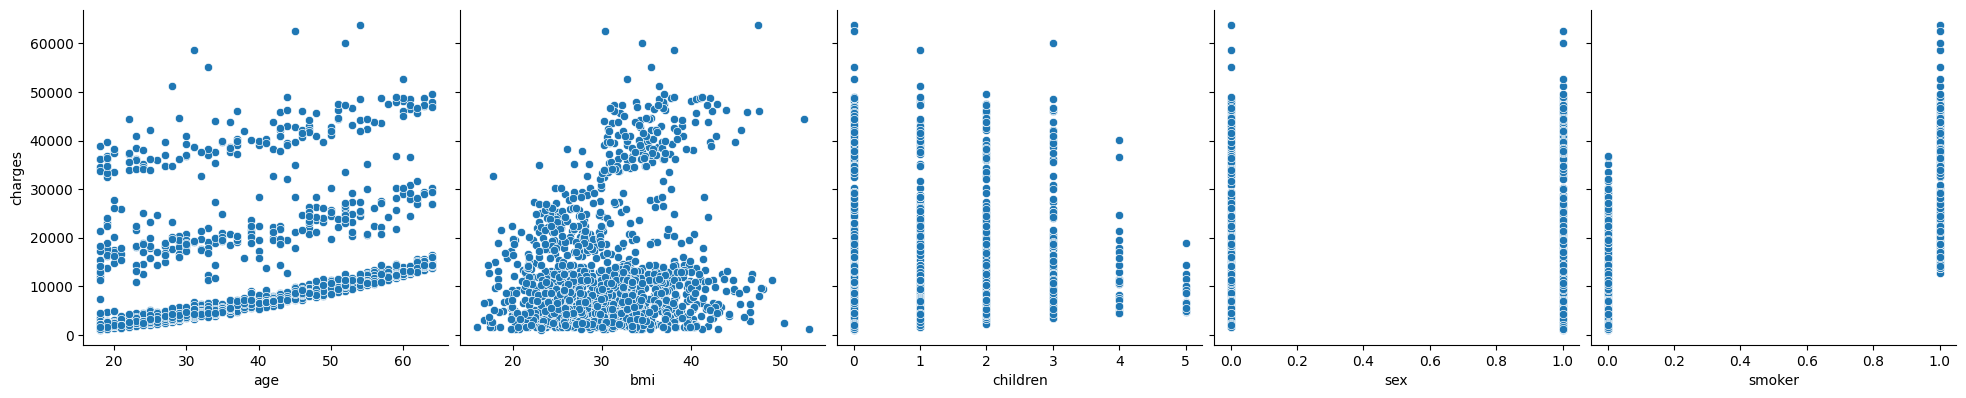

In [75]:
# Import library Matplotlib dan Seaborn untuk visualisasi data.
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'bmi', 'children','sex','smoker'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

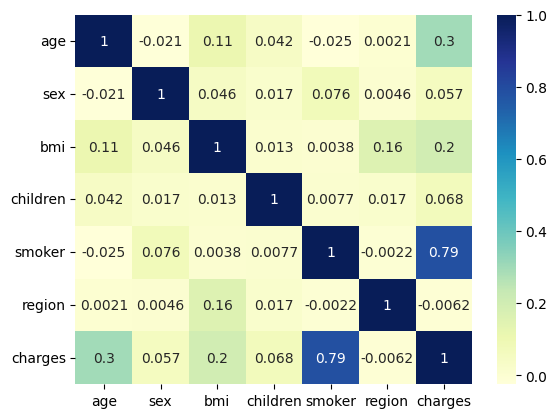

In [76]:
#  Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.


# Memilih kolom yang bertipe int dan float
numeric_data = data.select_dtypes(include=['int', 'float'])

# Visualisasi korelasi dengan heatmap
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

**1. Identifikasi Variabel**

In [77]:
# Membuat variabel bebas X dan Y yang diambil dari analisis korelasi sebelumnya
x = data[['smoker','age','bmi']] # 3 data tertinggi yang berpengaruh pada variabel dependen
y = data['charges']


**2. Pembagian data latih dan data uji**

In [78]:
# Pembagian data latih dan data uji dengan proporsi 8:3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

**3. Feature Scalling**

In [79]:
# Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.
from sklearn.preprocessing import StandardScaler
sc_age = StandardScaler()
sc_bmi = StandardScaler()
sc_smoker = StandardScaler()

x_train_scaled = x_train.copy()
x_train_scaled['age'] = sc_age.fit_transform(x_train[['age']])
x_train_scaled['bmi'] = sc_bmi.fit_transform(x_train[['bmi']])
x_train_scaled['smoker'] = sc_smoker.fit_transform(x_train[['smoker']])

x_test_scaled = x_test.copy()
x_test_scaled['age'] = sc_age.transform(x_test[['age']])
x_test_scaled['bmi'] = sc_bmi.transform(x_test[['bmi']])
x_test_scaled['smoker'] = sc_smoker.transform(x_test[['smoker']])



**4.Membuat model multiple linear**

In [80]:
model = LinearRegression()



**5. Melatih model dan memprediksi pada data uji**

In [81]:
model.fit(x_train_scaled, y_train)
# Memprediksi nilai menggunakan data uji
y_pred = model.predict(x_test_scaled)



**6. Evaluasi model**

In [82]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 32669703.021733683
R-squared (R2): 0.7916580391198964
Mean Absolute Error (MAE): 3927.585081398138
